In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
wn=pd.read_csv('wineQuality.csv')
wn.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [3]:
wn.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [4]:
wn['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [5]:
wn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [6]:
for col in wn.columns:
 if wn[col].isnull().sum() > 0:
  wn[col] = wn[col].fillna(wn[col].mean())

wn.isnull().sum().sum()

0

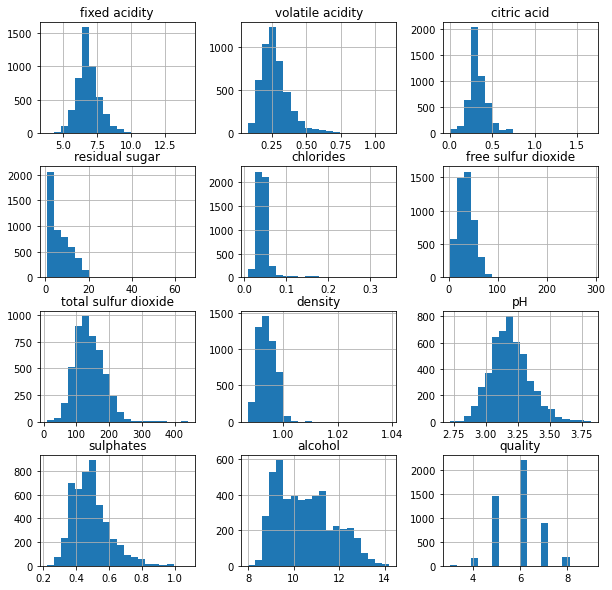

In [7]:
wn.hist(bins=20, figsize=(10, 10))
plt.show()

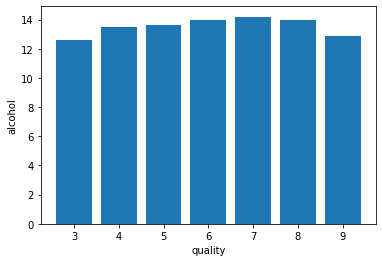

In [8]:
plt.bar(wn['quality'], wn['alcohol'])
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.show()

<AxesSubplot:xlabel='quality', ylabel='count'>

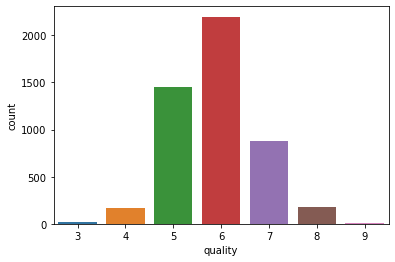

In [9]:
sns.countplot(x='quality', data=wn)

In [10]:
wn['good_quality']=[1 if x>5 else 0 for x in wn.quality]

<AxesSubplot:xlabel='good_quality', ylabel='count'>

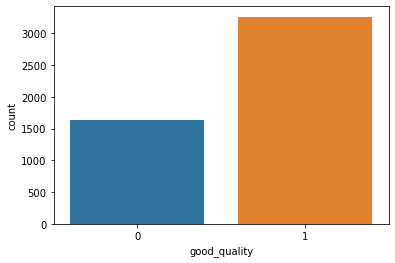

In [11]:
sns.countplot(x='good_quality', data=wn)#devang's code

## making of variables x and y

In [12]:
X=wn.drop(columns=['quality', 'good_quality'], axis=1)
y=wn['good_quality']

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=42)

In [15]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3918, 11), (980, 11), (3918,), (980,))

In [16]:
from sklearn.preprocessing import StandardScaler


In [17]:
wn.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'good_quality'],
      dtype='object')

In [18]:
column=['fixed acidity', 'residual sugar',
       'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH','alcohol']
print(len(column))

7


In [19]:
scaler=StandardScaler()
for i in column:
    X_train[i]=scaler.fit_transform(X_train[[i]])
    X_test[i]=scaler.fit_transform(X_test[[i]])

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [21]:
clfs=[LogisticRegression(), SVC(kernel='rbf'), DecisionTreeClassifier(max_depth=10), DecisionTreeClassifier(min_samples_leaf=10, random_state=42)]

In [22]:
model_aucc={}#empty dictionary
for clf in clfs:
    print(f'Model (clf)')
    clf.fit(X_train, y_train)
    print(f'Training Score: {clf.score(X_train, y_train)}*100')
    print(f'Training Score: {clf.score(X_test, y_test)}*100')
    model_aucc.update({clf:clf.score(X_train, y_train)})
print('------------------')

Model (clf)
Training Score: 0.7475752935171006*100
Training Score: 0.7448979591836735*100
Model (clf)
Training Score: 0.7917304747320061*100
Training Score: 0.7571428571428571*100
Model (clf)
Training Score: 0.9065849923430321*100
Training Score: 0.753061224489796*100
Model (clf)
Training Score: 0.8557937723328228*100
Training Score: 0.7418367346938776*100
------------------


In [23]:
model_aucc.values()

dict_values([0.7475752935171006, 0.7917304747320061, 0.9065849923430321, 0.8557937723328228])

In [24]:
data={
    'model':['Logistic_regression', 'SVM', 'Decision_tree1', 'Decision_tree2'],
    'score':[0.7496171516079633, 0.6636038795303726, 0.9050535987748851, 0.8557937723328228]}
data_Score=pd.DataFrame(data)

In [25]:
data_Score

,model,score
0,Logistic_regression,0.749617
1,SVM,0.663604
2,Decision_tree1,0.905054
3,Decision_tree2,0.855794


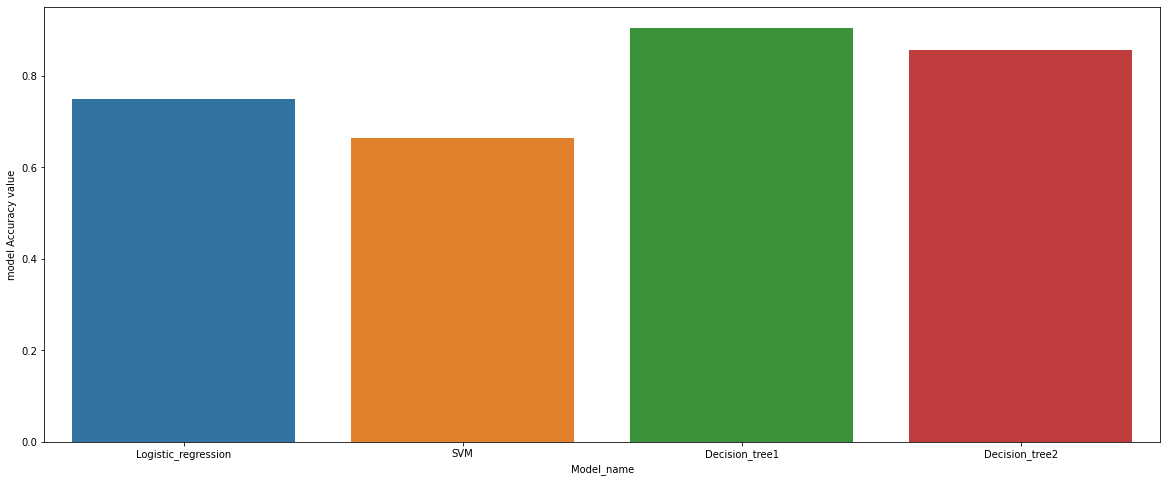

In [26]:
plt.figure(figsize=(20,8))
sns.barplot(x='model', y='score',data=data_Score )
plt.xlabel('Model_name')
plt.ylabel("model Accuracy value")
plt.show()

In [27]:
from sklearn import svm
SVC_clf = svm.SVC()
SVC_clf.fit(X_train, y_train)

SVC()

In [28]:
import pickle as pkl

In [29]:
pkl.dump(SVC_clf,open("svc_clf.pkl", "wb"))